In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("20-digitalskysurvey.csv")

In [23]:
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [25]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [26]:
col_to_drop = ["objid","run","rerun","camcol","field","specobjid"]

In [27]:
df.drop(col_to_drop,axis=1,inplace=True)

In [28]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  plate    mjd  fiberid  
0    STAR -0.000009   3306  54922      491  
1    STAR -0.000055    323  51615      541  
2  GALAXY  0.123111    287  52023      513  
3    STAR -0.000111   3306  54922      510  
4    STAR  0.000590   3306  54922      512

In [29]:
df["class"].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

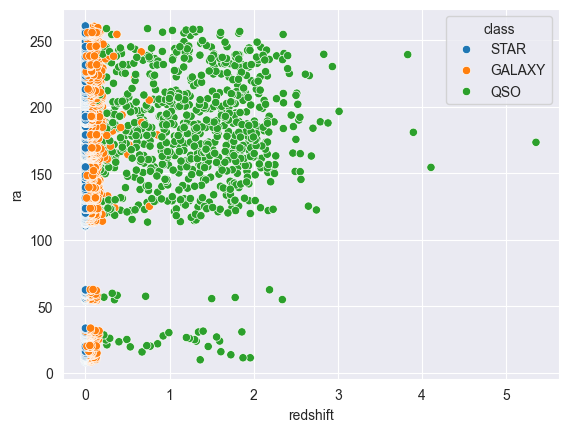

In [30]:
sns.scatterplot(data=df,x="redshift",y="ra",hue="class")
plt.show()

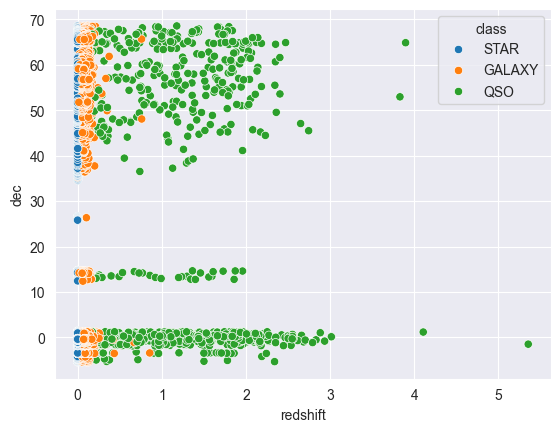

In [31]:
sns.scatterplot(data=df,x="redshift",y="dec",hue="class")
plt.show()

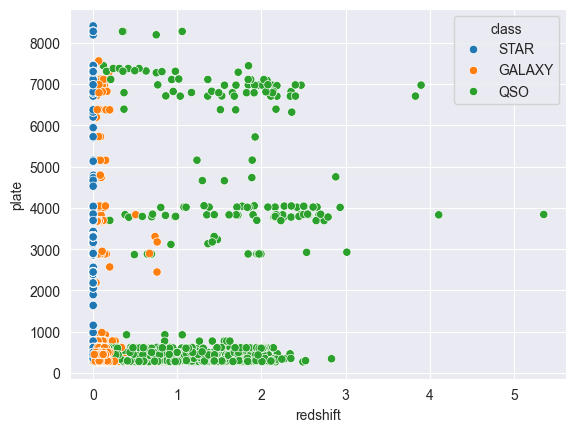

In [32]:
sns.scatterplot(data=df,x="redshift",y="plate",hue="class")
plt.show()

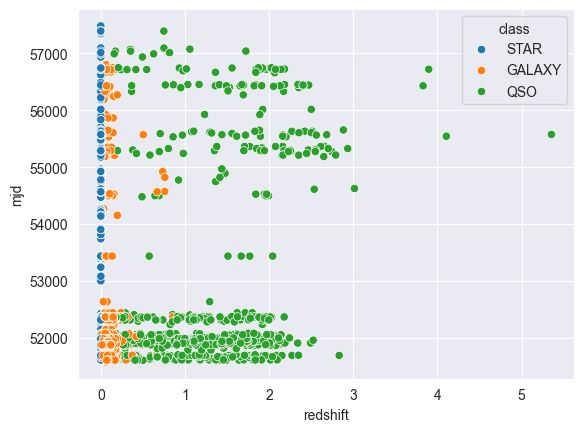

In [33]:
sns.scatterplot(data=df,x="redshift",y="mjd",hue="class")
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

In [35]:
df.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   class  redshift  plate    mjd  fiberid  
0      2 -0.000009   3306  54922      491  
1      2 -0.000055    323  51615      541  
2      0  0.123111    287  52023      513  
3      2 -0.000111   3306  54922      510  
4      2  0.000590   3306  54922      512

In [36]:
df.corr()

ra       dec         u         g         r         i  \
ra        1.000000  0.003596  0.031238  0.043909  0.047103  0.045731   
dec       0.003596  1.000000  0.035279  0.061875  0.063404  0.058292   
u         0.031238  0.035279  1.000000  0.849232  0.692379  0.602630   
g         0.043909  0.061875  0.849232  1.000000  0.958106  0.907419   
r         0.047103  0.063404  0.692379  0.958106  1.000000  0.977672   
i         0.045731  0.058292  0.602630  0.907419  0.977672  1.000000   
z         0.042950  0.056870  0.551483  0.879622  0.969197  0.981507   
class    -0.043219 -0.058918 -0.269044 -0.099212  0.049628  0.146791   
redshift  0.030307  0.067021  0.163741  0.407576  0.441080  0.431450   
plate    -0.095329  0.088342 -0.129430 -0.054981  0.019787  0.072958   
mjd      -0.086887  0.066147 -0.168793 -0.092772 -0.009345  0.050896   
fiberid   0.057485  0.155012  0.011301  0.047187  0.061081  0.069977   

                 z     class  redshift     plate       mjd   fiberid  
ra        0.042950 -0.043219  0.030307 -0.095329 -0.086887  0.057485  
dec       0.056870 -0.058918  0.067021  0.088342  0.066147  0.155012  
u         0.551483 -0.269044  0.163741 -0.129430 -0.168793  0.011301  
g         0.879622 -0.099212  0.407576 -0.054981 -0.092772  0.047187  
r         0.969197  0.049628  0.441080  0.019787 -0.009345  0.061081  
i         0.981507  0.146791  0.431450  0.072958  0.050896  0.069977  
z         1.000000  0.215758  0.424034  0.112397  0.095658  0.067980  
class     0.215758  1.000000 -0.075510  0.585495  0.648768  0.053593  
redshift  0.424034 -0.075510  1.000000 -0.038091 -0.057957  0.046532  
plate     0.112397  0.585495 -0.038091  1.000000  0.966881  0.229811  
mjd       0.095658  0.648768 -0.057957  0.966881  1.000000  0.190328  
fiberid   0.067980  0.053593  0.046532  0.229811  0.190328  1.000000

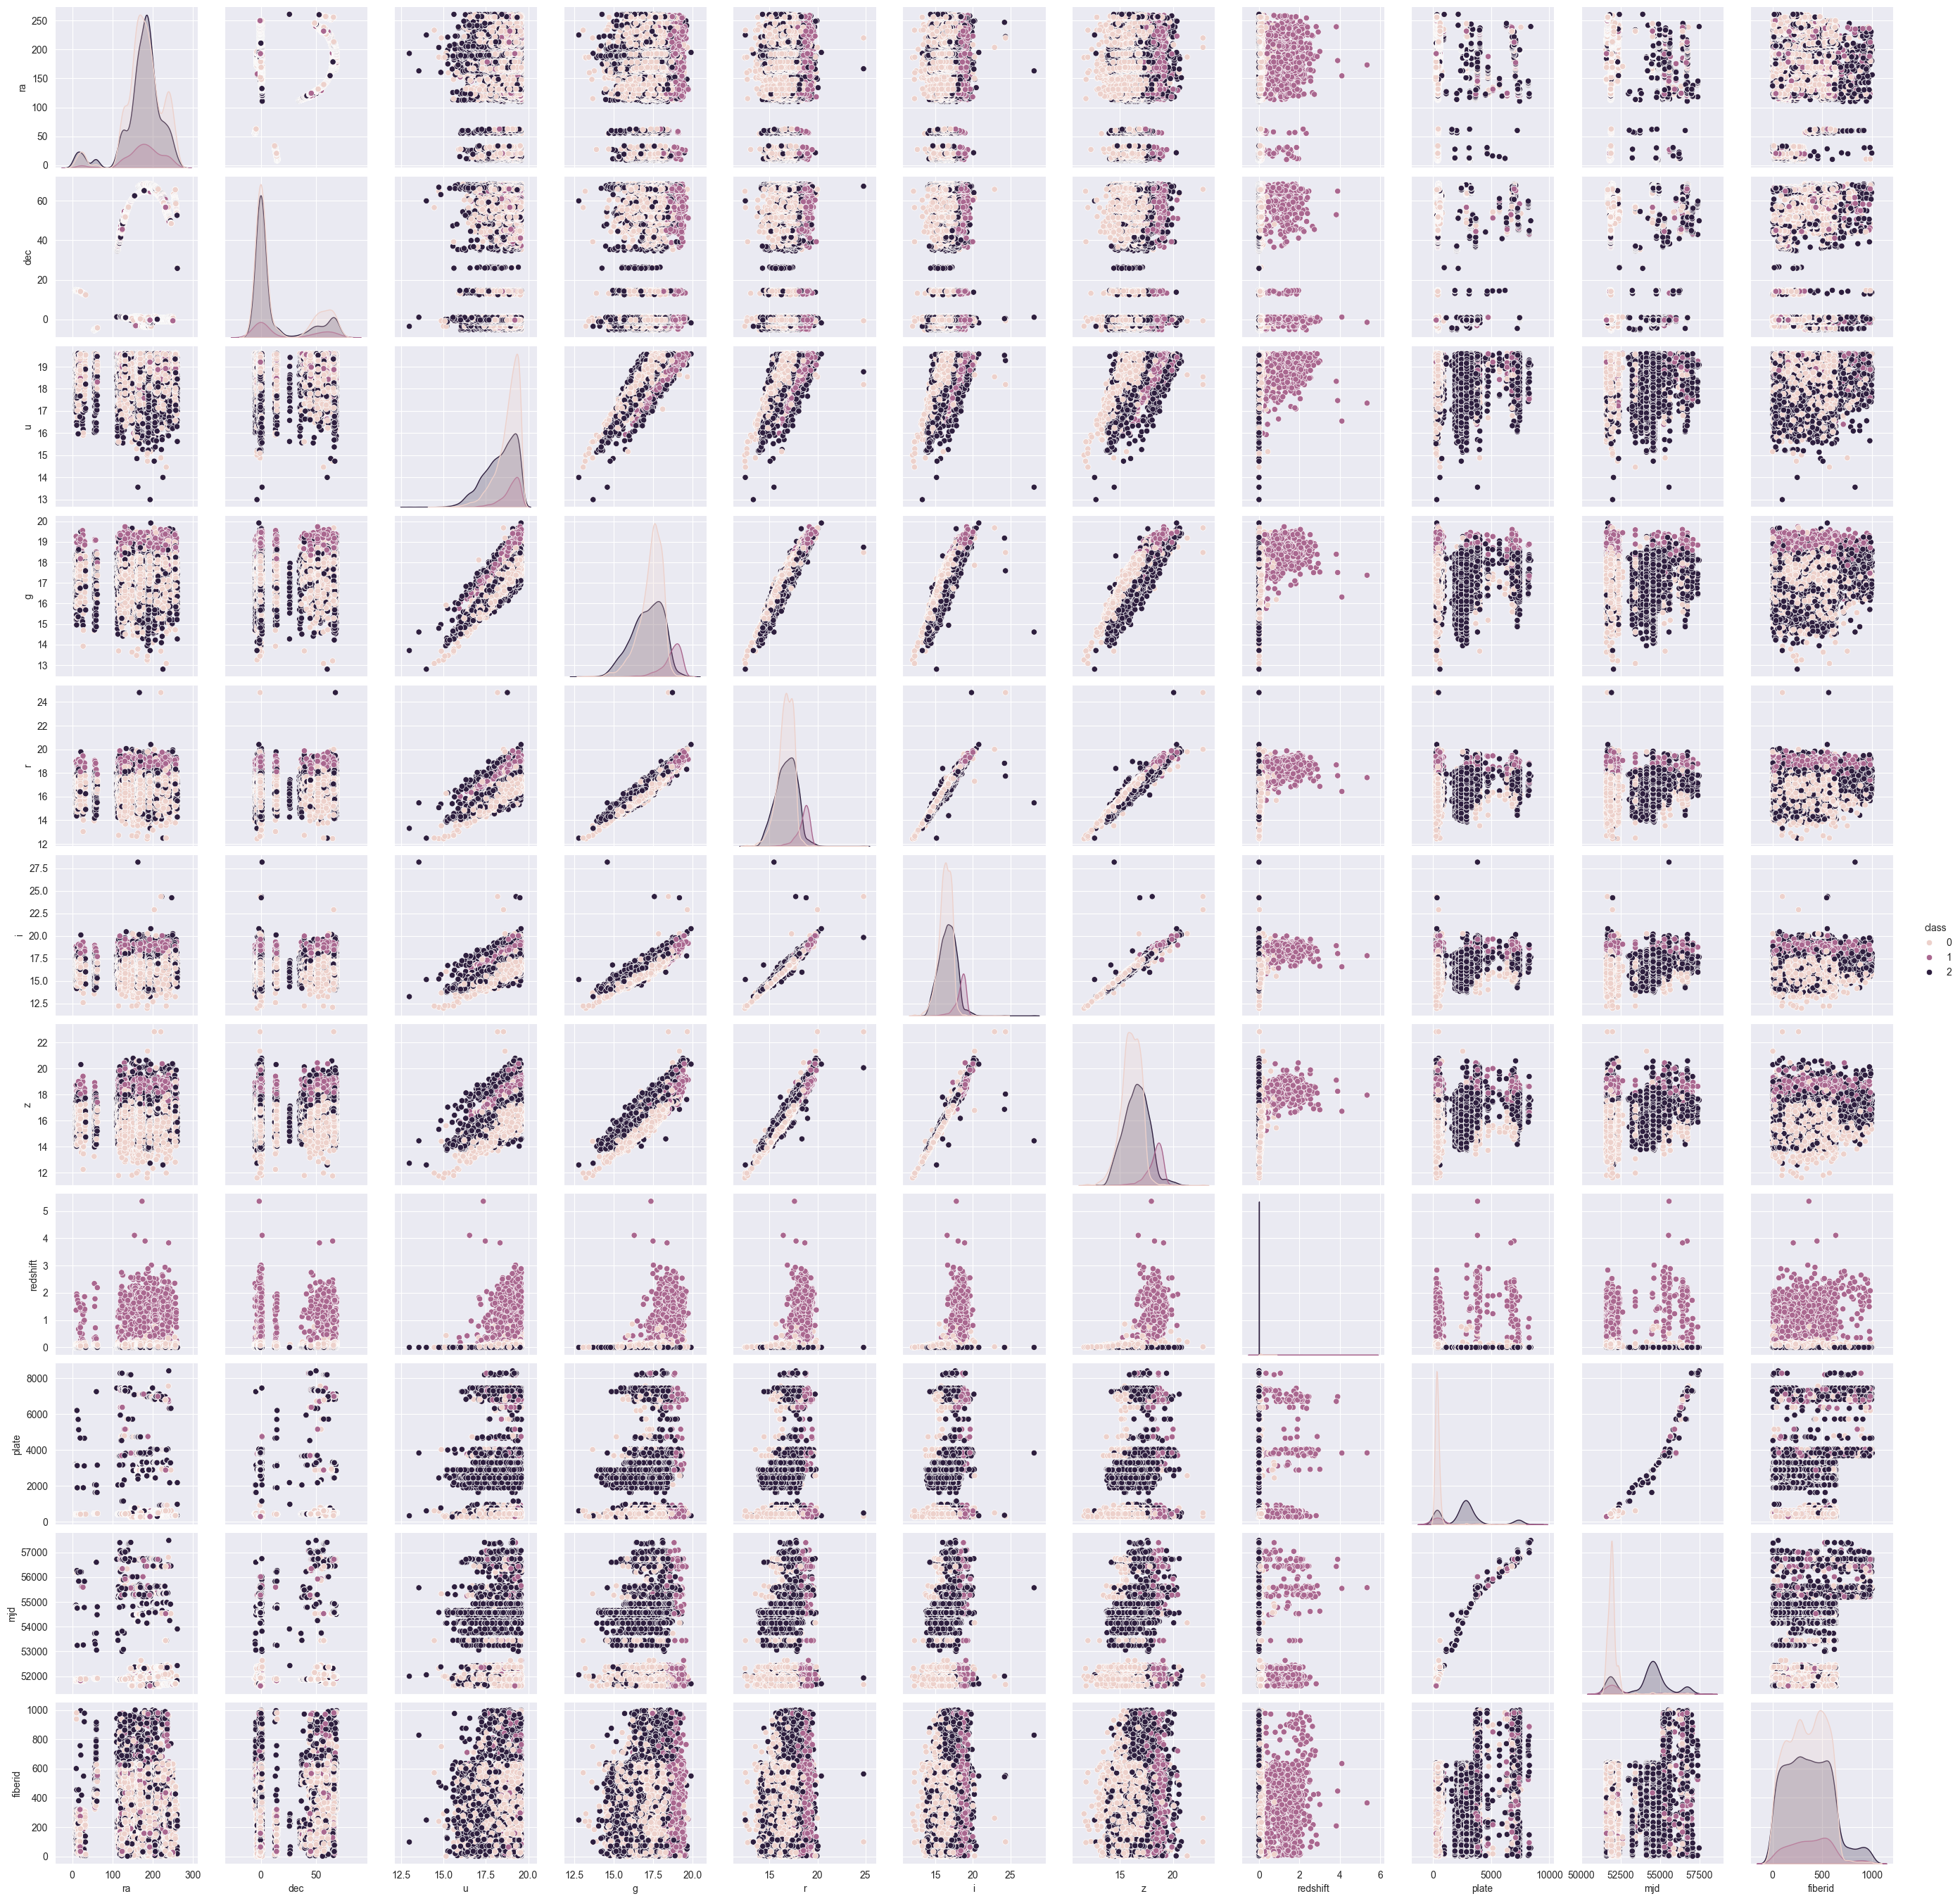

In [37]:
sns.pairplot(df,hue="class")
plt.show()

<Axes: xlabel='redshift', ylabel='Count'>

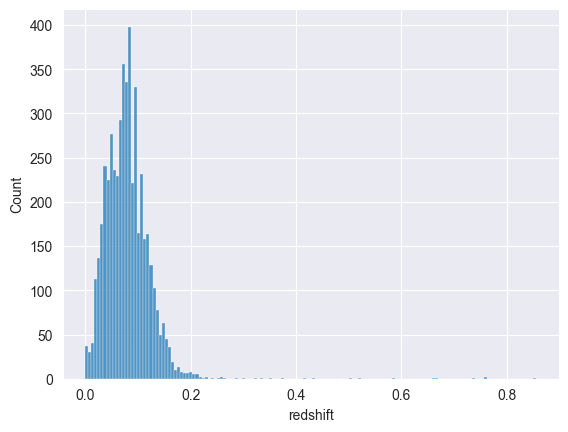

In [41]:
sns.histplot(df[df["class"]==0].redshift)

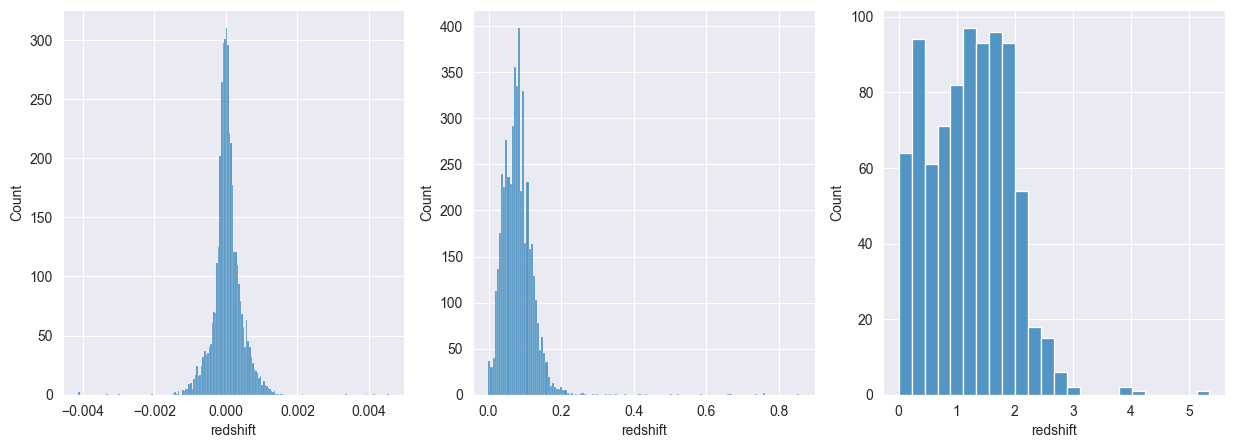

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax = sns.histplot(df[df["class"]==2].redshift,ax=axes[0])
ax = sns.histplot(df[df["class"]==0].redshift,ax=axes[1])
ax = sns.histplot(df[df["class"]==1].redshift,ax=axes[2])
ax.set_title("QSO")

In [45]:
df["class"].value_counts()

class
0    4998
2    4152
1     850
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
X = df.drop("class",axis=1)
y = df["class"]

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion_matrix\n",confusion_matrix(y_test,y_pred))
print("classification_report\n",classification_report(y_test,y_pred))
print("accuracy_score\n",accuracy_score(y_test,y_pred))

confusion_matrix
 [[1002   11    1]
 [  11  147    0]
 [   1    0  827]]
classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1014
           1       0.93      0.93      0.93       158
           2       1.00      1.00      1.00       828

    accuracy                           0.99      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000

accuracy_score
 0.988


In [51]:
#hyperparameter tuning

In [52]:
params = {
    "n_estimators":[100,200,300,500],
    "max_depth":[2,3,4,5],
    "learning_rate":[0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.1,0.2,0.3,0.4],
}

In [53]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=params,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 500]})

In [54]:
grid.best_params_

{'colsample_bytree': 0.2,
 'learning_rate': 0.4,
 'max_depth': 4,
 'n_estimators': 300}

In [55]:
y_pred2 = grid.predict(X_test)
print("confusion_matrix\n",confusion_matrix(y_test,y_pred2))
print("classification_report\n",classification_report(y_test,y_pred2))
print("accuracy_score\n",accuracy_score(y_test,y_pred2))

confusion_matrix
 [[1002   11    1]
 [  12  146    0]
 [   1    0  827]]
classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1014
           1       0.93      0.92      0.93       158
           2       1.00      1.00      1.00       828

    accuracy                           0.99      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000

accuracy_score
 0.9875
